In [1]:
import os
import sys
import json
from matplotlib import pyplot as plt

In [3]:
processing_result_path = '0.0.0'

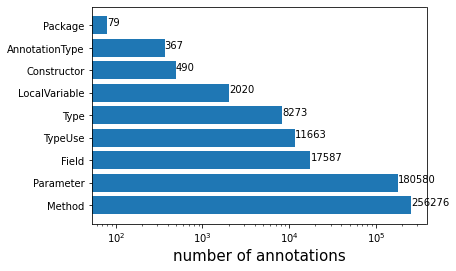

In [5]:
number_of_usage = {}

for root, dirs, files in os.walk(processing_result_path):
    for file in files:
        if not file.endswith("json"):
            continue
        with open(os.path.join(root, file), "r") as read_file:
            data = json.load(read_file)
            for usage in data["usages"]:
                target_type = usage["features"]["targetType"]
                number_of_usage[target_type] = number_of_usage.get(target_type, 0) + 1

types = []
values = []

for type in sorted(number_of_usage, key=number_of_usage.get, reverse=True):
    types += [type]
    values += [number_of_usage[type]]

pl = plt.barh(types, values, log=True)
for bar in pl:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')

plt.xlabel('number of annotations', fontsize=15)
plt.show()

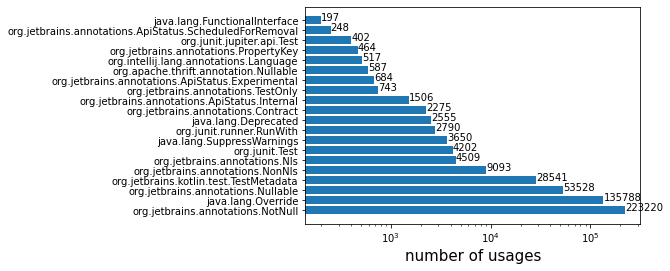

In [6]:
number_of_usage = {}

for root, dirs, files in os.walk(processing_result_path):
    for file in files:
        if not file.endswith("json"):
            continue
        with open(os.path.join(root, file), "r") as read_file:
            data = json.load(read_file)
            annotation_name = data["typeInfo"]["name"]
            number_of_annotation_usage = len(data["usages"])
            number_of_usage[annotation_name] = number_of_usage.get(annotation_name, 0) + number_of_annotation_usage

annotations = []
values = []

for annotation in sorted(number_of_usage, key=number_of_usage.get, reverse=True):
    annotations += [annotation]
    values += [number_of_usage[annotation]]



pl = plt.barh(annotations[:20], values[:20], log=True)
for bar in pl:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')

plt.xlabel('number of usages', fontsize=15)
plt.show()